In [1]:
import os
import pandas as pd
from google.cloud import bigquery
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Set environment variable. 
#Note: Adjust path to were you stored your json file
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "viamo-datakind-19b12e3872f5.json"
#No

In [3]:
#Note: adjust paramenters in SQL query according to your needs
query_uganda = "SELECT * FROM `viamo-datakind.datadive.321_sessions_1122` where organization_country='Uganda' LIMIT 10000"

In [4]:
#Pull data from BigQuery and store in pandas DataFrame

Bigquery_client = bigquery.Client()

df_uganda = pd.read_gbq(query_uganda)

In [5]:
df_uganda.shape

(10000, 44)

In [6]:
duplicate = df_uganda[df_uganda.duplicated()]

In [7]:
duplicate.sum().sum() # no dupes in the data

/var/folders/xz/6s1ypdzx5_54gr8yjyqg71z80000gn/T/ipykernel_9778/4276082807.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  duplicate.sum().sum() # no dupes in the data


0.0

In [8]:
# viewing a random sample of the dataset
df_uganda.sample(n=5, random_state=1)

,call_date,dl_global_created_at,block_interaction_id,call_id,subscriber_id,block_global_created_at,block_entry_at,js_key,tree_version_set_id,call_started,...,phone_type,education_level,income_source,airtime_expense,highest_expense_area,data_usage_consent,new_listener_ever,new_listener_year,new_caller_ever,new_caller_year
9953,2022-09-29,2022-09-29 06:35:22+00:00,1422104913638851332,1422104913533996632,888884848138649600,2022-09-29 06:17:12+00:00,2022-09-29 06:17:12+00:00,block_1568896479947_66,36972,2022-09-29 06:17:12+00:00,...,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>
3850,2022-03-18,2022-03-18 14:21:50+00:00,1351560429318964212,1351559274031480876,1276783077611800368,2022-03-18 14:19:57+00:00,2022-03-18 14:18:37+00:00,block_1626356054193_75,36659,2022-03-18 14:14:01+00:00,...,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>
4962,2022-09-20,2022-09-20 14:07:03+00:00,1418960783538654184,1418960402515494940,1393828609781140828,2022-09-20 14:07:03+00:00,2022-09-20 14:03:33+00:00,block_1585825559967_16,19446,2022-09-20 14:02:02+00:00,...,None,None,None,None,None,None,1393828609781140828,1393828609781140828,<NA>,<NA>
3886,2021-07-04,2021-07-04 13:00:06+00:00,1258406742539636692,1258405555761318692,1258405555673236724,2021-07-04 13:00:06+00:00,2021-07-04 12:59:07+00:00,block_1600348254991_43,24019,2021-07-04 12:54:24+00:00,...,None,None,None,None,None,None,1258405555673236724,<NA>,1258405555673236724,<NA>
5437,2022-10-17,2022-10-17 20:17:21+00:00,1428835521090031252,1428834273540440140,1428344897261799764,2022-10-17 20:02:50+00:00,2022-10-17 20:02:14+00:00,block_1540987272671_56,2567,2022-10-17 19:57:17+00:00,...,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>


In [9]:
# filtering object type columns
cat_columns = df_uganda.describe(include=["object"]).columns
cat_columns

Index(['js_key', 'region', 'region_name', 'organization_country',
       'listen_menu_or_digest', 'block_title', 'block_tags', 'block_theme',
       'block_topic', 'age', 'gender', 'location', 'location_level_2',
       'opt_in', 'subscriber_pereferred_language', 'rural_or_urban',
       'phone_type', 'education_level', 'income_source', 'airtime_expense',
       'highest_expense_area', 'data_usage_consent'],
      dtype='object')

In [10]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(df_uganda[i].value_counts())
    print("*" * 50)

Unique values in js_key are :
block_1477742758446_29    1413
block_1568896479947_66    1058
block_1545984239017_51     756
block_1464695840754_80     418
block_1600418307411_94     288
                          ... 
block_1649373711899_85       1
block_1556626866629_39       1
block_1637754040896_55       1
block_1556620145223_30       1
block_1544513113769_32       1
Name: js_key, Length: 795, dtype: int64
**************************************************
Unique values in region are :
EAF    10000
Name: region, dtype: int64
**************************************************
Unique values in region_name are :
East Africa    10000
Name: region_name, dtype: int64
**************************************************
Unique values in organization_country are :
Uganda    10000
Name: organization_country, dtype: int64
**************************************************
Unique values in listen_menu_or_digest are :
Listen Menu      7189
Listen Digest    1009
Name: listen_menu_or_digest, dtype: i

### Observations

* Unique values in gender are : male:387674, female:234668
* By Region - region_central:189141,no_contact:144756,region_eastern:46388
* Famous block topics - srh:27029,coronavirus:25178
* block_theme highest values - health:95267,drama:65822
* Unique values in js_key are -block_1568896479947_66:126274,block_1477742758446_29:125780

In [11]:
df_uganda.skew()

/var/folders/xz/6s1ypdzx5_54gr8yjyqg71z80000gn/T/ipykernel_9778/1520539334.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_uganda.skew()


block_interaction_id           -0.873338
call_id                        -0.873336
subscriber_id                  -0.735827
tree_version_set_id            -0.402256
duration_listened_minutes       3.878657
duration_listened_seconds       3.887720
organization_id                 0.000000
block_audio_percent_listened   -1.987375
km_block_reached               -1.138636
km_block_listened              -1.152679
listener                       -0.682502
registered_demographic_info    -0.856847
rural_or_urban                       NaN
phone_type                           NaN
education_level                      NaN
income_source                        NaN
airtime_expense                      NaN
highest_expense_area                 NaN
data_usage_consent                   NaN
new_listener_ever              -1.972284
new_listener_year              -0.582459
new_caller_ever                -0.689672
new_caller_year                -0.419233
dtype: float64

In [12]:
data_uganda = df_uganda.copy()

In [13]:
data_uganda.shape

(10000, 44)

### Q1- Distribution of calls (unique call ids) over time (day, week, month)


In [14]:
call_start = data_uganda['call_started']
data_uganda['call_date'] = call_start.apply(lambda x: x.date())
data_uganda['call_day'] = call_start.apply(lambda x: x.weekday())
data_uganda['call_week'] = call_start.apply(lambda x: x.date().isocalendar().week)
data_uganda['call_month'] = call_start.apply(lambda x: x.date().month)


/Users/waylandsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'number of calls per day')]

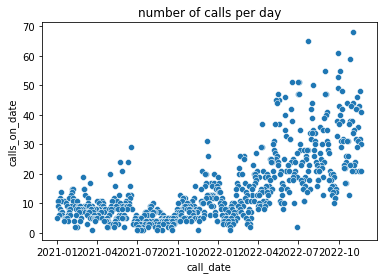

In [102]:
calls_by_date = data_uganda[['call_date']].value_counts().to_frame().rename(columns={0:'calls_on_date'}).reset_index()
(sns
     .scatterplot(calls_by_date['call_date'], calls_by_date['calls_on_date'])
     .set(title="number of calls per day")
 
)

In [94]:
calls_by_date

,call_date,calls_on_date
0,2022-11-01,68
1,2022-07-22,65
2,2022-09-30,61
3,2022-10-27,59
4,2022-10-03,55
...,...,...
679,2021-03-20,1
680,2021-09-18,1
681,2021-06-30,1
682,2022-01-28,1


In [18]:
data_uganda[['call_week']].value_counts()

call_week
39           361
40           336
35           326
44           315
24           315
dtype: int64

In [19]:
data_uganda[['call_month']].value_counts()

call_month
10            1249
5             1050
8             1039
11             987
7              971
6              970
9              914
4              690
3              664
2              556
1              486
12             424
dtype: int64

### Q2 - Distribution of number of calls per subscriber (overall, by month)



In [20]:
df_uganda_grp_subscriber = data_uganda.groupby('subscriber_id')

In [53]:
calls_per_sub_month = (df_uganda_grp_subscriber['call_month']
                       .value_counts()
                       .to_frame()
                       .rename(columns={'call_month':'call_count'})
                       .reset_index()
                                                            
                      )
calls_per_sub_month

,subscriber_id,call_month,call_count
0,570265192890368000,2,1
1,570292069990400000,12,1
2,570666042523648000,4,1
3,570918468321280000,7,1
4,571303375405056000,5,1
...,...,...,...
9721,1441103400543977556,11,1
9722,1441115238820218976,11,1
9723,1441142566749211464,11,1
9724,1441321227792158160,11,1


(array([8.932e+03, 7.600e+01, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <BarContainer object of 10 artists>)

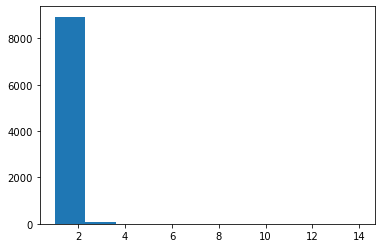

In [64]:
# calls overall
calls_overall = calls_per_sub_month.groupby('subscriber_id')['call_count'].sum()
plt.hist(
    x = calls_overall
)


In [80]:
(calls_per_sub_month
                    .where(calls_per_sub_month['call_month']==1)
                    .groupby('subscriber_id')['call_count']
                    .sum())

2.0

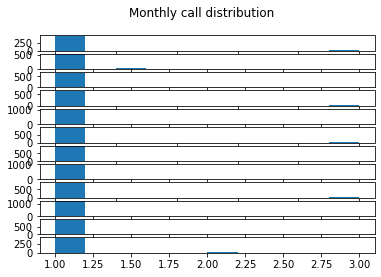

In [81]:
# calls per month
# histogram

fig, axs = plt.subplots(12)
fig.suptitle('Monthly call distribution')
# axs[0].plot(x, y)
# axs[1].plot(x, -y)

for i in range(1,13):
    # plot the histogram for that month's call distribution
    data_to_plot = (calls_per_sub_month
                    .where(calls_per_sub_month['call_month']==i)
                    .groupby('subscriber_id')['call_count']
                    .sum()
                   
                   )
    axs[i-1].hist(data_to_plot)

### Q3 - Distribution of time between calls per subscriber by calls

In [22]:
# this one seems a bit tricky to me
# perhaps a "reduce" is in orderhere to get the average time between calls

### Q4- Frequency of calls by demographic variables (e.g. gender, education)



In [23]:
data_uganda.groupby("gender")["location"].value_counts()

gender  location             
female  region_eastcentral       1409
        region_western            855
        region_southwestern       494
        region_nw_westnile        379
        region_ne_karamoja        114
        Centre                      1
        kampala                     1
        province_antananarivo       1
male    region_eastcentral       2291
        region_western           2037
        region_nw_westnile        924
        region_southwestern       841
        region_ne_karamoja        252
        province_antananarivo       1
Name: location, dtype: int64

In [24]:
df_grouped_loc = data_uganda.sort_values(['location','gender'],ascending=False).groupby(["location","gender"])

In [25]:
df_ed = (
    df_grouped_loc["subscriber_id"]
    .count()
    .to_frame()
    .rename(columns={"subscriber_id": "counts"})
    .reset_index()
)

In [26]:
df_ed

,location,gender,counts
0,Centre,female,1
1,kampala,female,1
2,province_antananarivo,female,1
3,province_antananarivo,male,1
4,region_eastcentral,female,1409
5,region_eastcentral,male,2291
6,region_ne_karamoja,female,114
7,region_ne_karamoja,male,252
8,region_nw_westnile,female,379
9,region_nw_westnile,male,924


/Users/waylandsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


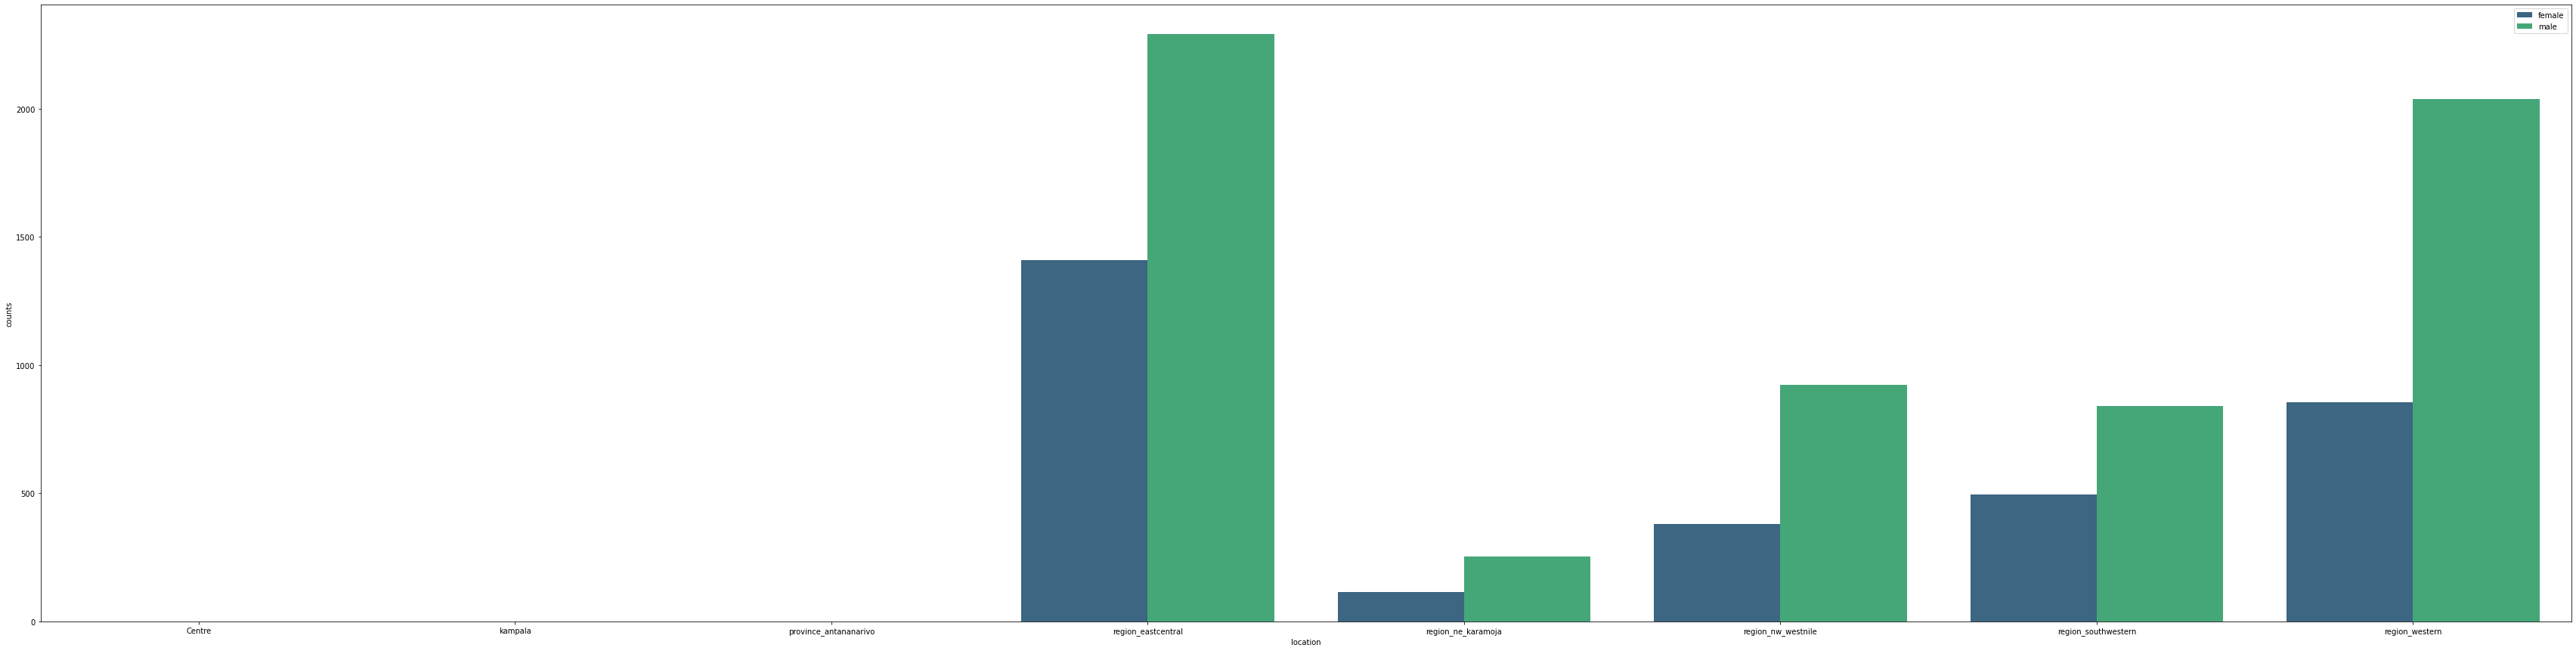

In [27]:
plt.figure(figsize=(60, 15))
sns.barplot(
    df_ed["location"],
    df_ed["counts"],
    hue=df_ed["gender"],
    palette="viridis",
)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

In [28]:
df_grouped_edulvl_loc= data_uganda.sort_values(['location','education_level'],ascending=False).groupby(["location","education_level"])

In [29]:
df_edulvl = (
    df_grouped_edulvl_loc["subscriber_id"]
    .count()
    .to_frame()
    .rename(columns={"subscriber_id": "counts"})
    .reset_index()
)

In [30]:
df_edulvl

,location,education_level,counts


 ### helper functions

In [31]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()